<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
## <font color='blue'>Matemática e Estatística Aplicada Para Data Science, Machine Learning e IA</font>
## <font color='blue'>Projeto 5</font>
### <font color='blue'>Tratamento de Dados Categóricos e o Impacto em Modelagem Estatística</font>

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [2]:
# Imports
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" 

Author: Data Science Academy



## Carregando e Identificando os Tipos de Dados

In [4]:
# Carrega o dataset
df_dsa = pd.read_csv('dataset.csv')

In [5]:
# Shape
df_dsa.shape

(400, 7)

In [6]:
# Info
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   valor_venda_unitario  400 non-null    float64
 1   valor_venda_total     400 non-null    int64  
 2   custo_entrega         400 non-null    int64  
 3   status_entrega        400 non-null    object 
 4   idade_vendedor        400 non-null    int64  
 5   area_urbana           400 non-null    object 
 6   cliente_local         400 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 22.0+ KB


In [7]:
# Amostra dos dados
df_dsa.head()

,valor_venda_unitario,valor_venda_total,custo_entrega,status_entrega,idade_vendedor,area_urbana,cliente_local
0,9.50,138,11,Ruim,42,Sim,Sim
1,11.22,111,16,Bom,65,Sim,Sim
2,10.06,113,10,Medio,59,Sim,Sim
3,7.40,117,4,Medio,55,Sim,Sim
4,4.15,141,3,Ruim,38,Sim,Nao


## Análise Exploratória de Acordo com o Tipo de Variável

In [8]:
# Configuração de estilo
sns.set(style="darkgrid")

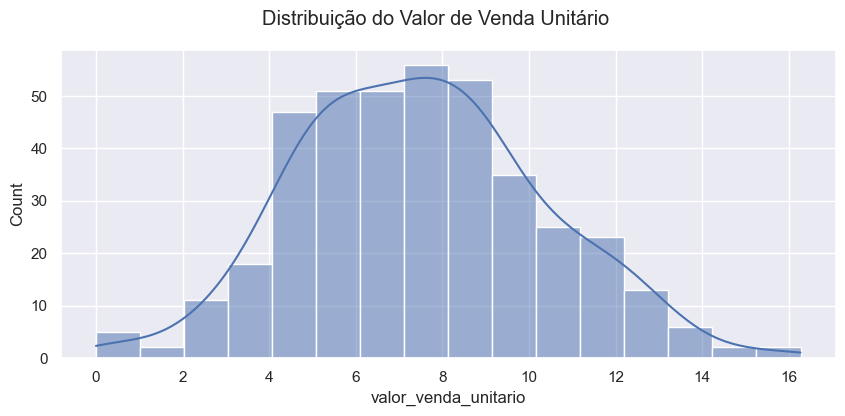

In [9]:
# Plot de valor_venda_unitario
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Distribuição do Valor de Venda Unitário')
sns.histplot(df_dsa['valor_venda_unitario'], kde = True);

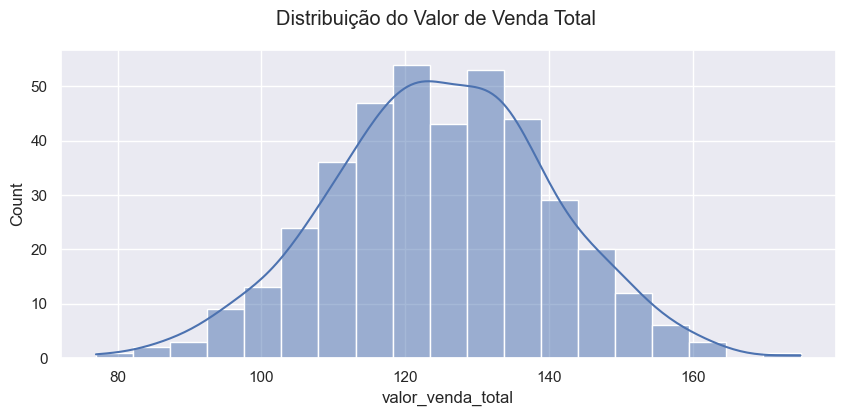

In [10]:
# Plot de valor_venda_total
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Distribuição do Valor de Venda Total')
sns.histplot(df_dsa['valor_venda_total'], kde = True);

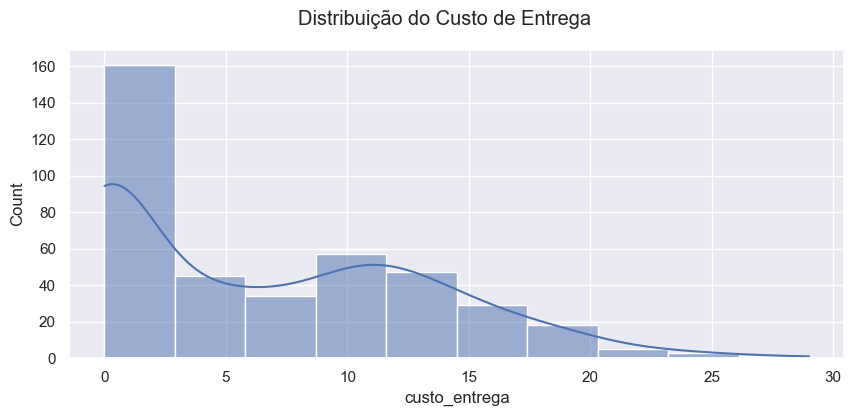

In [11]:
# Plot de custo_entrega
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Distribuição do Custo de Entrega')
sns.histplot(df_dsa['custo_entrega'], kde = True);

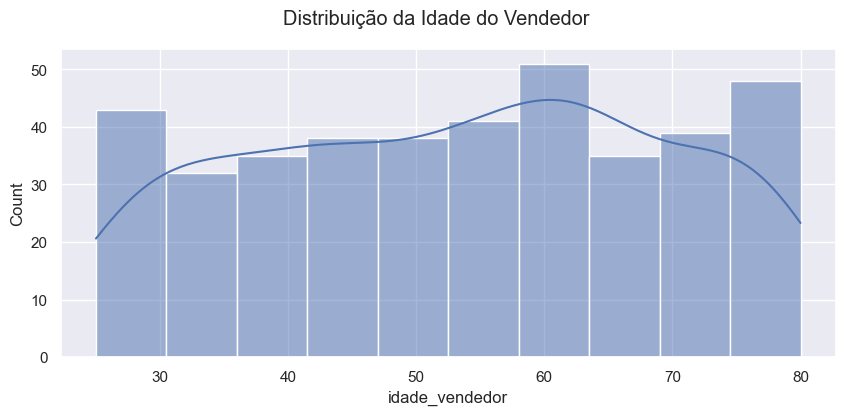

In [12]:
# Plot de idade_vendedor
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Distribuição da Idade do Vendedor')
sns.histplot(df_dsa['idade_vendedor'], kde = True);

In [13]:
# Configuração de estilo
sns.set(style="whitegrid")

In [14]:
# Tabela de frequência
df_dsa['status_entrega'].value_counts()

status_entrega
Medio    219
Ruim      96
Bom       85
Name: count, dtype: int64

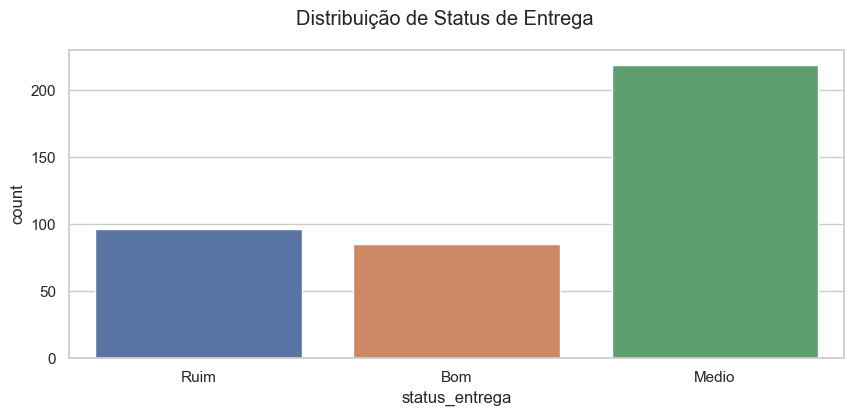

In [15]:
# Plot de status_entrega
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Distribuição de Status de Entrega')
sns.countplot(data = df_dsa, x = 'status_entrega');

In [16]:
# Tabela de frequência
df_dsa['area_urbana'].value_counts()

area_urbana
Sim    282
Nao    118
Name: count, dtype: int64

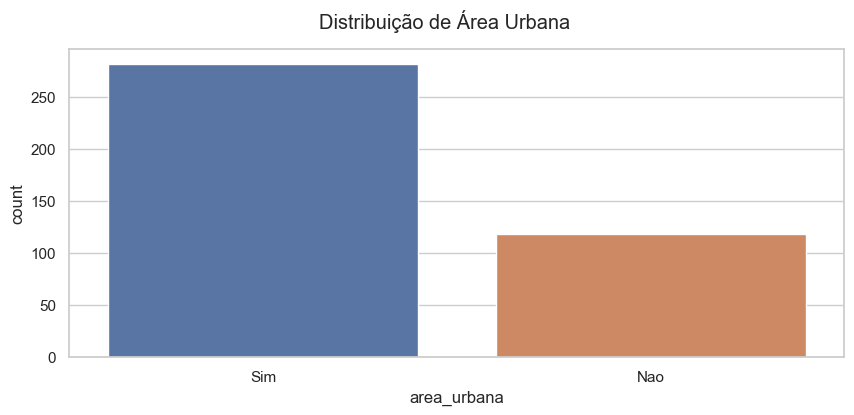

In [17]:
# Plot de area_urbana
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Distribuição de Área Urbana')
sns.countplot(data = df_dsa, x = 'area_urbana');

In [18]:
# Tabela de frequência
df_dsa['cliente_local'].value_counts()

cliente_local
Sim    258
Nao    142
Name: count, dtype: int64

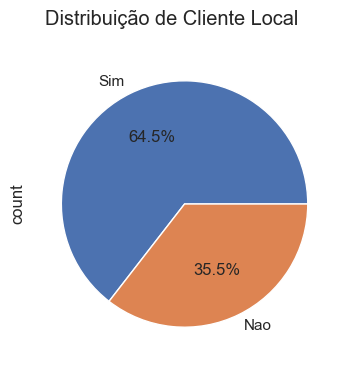

In [19]:
# Plot de cliente_local
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Distribuição de Cliente Local')
df_dsa['cliente_local'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');

## Criando e Analisando Tabela de Frequência em Python

In [20]:
# Cria a tabela de frequência
freq_status_entrega = df_dsa['status_entrega'].value_counts()

In [21]:
freq_status_entrega

status_entrega
Medio    219
Ruim      96
Bom       85
Name: count, dtype: int64

In [22]:
# Cria a tabela de frequência
freq_area_urbana = df_dsa['area_urbana'].value_counts()

In [23]:
freq_area_urbana

area_urbana
Sim    282
Nao    118
Name: count, dtype: int64

In [24]:
# Cria a tabela de frequência
freq_cliente_local = df_dsa['cliente_local'].value_counts()

In [25]:
freq_cliente_local

cliente_local
Sim    258
Nao    142
Name: count, dtype: int64

## Criando e Analisando Tabela de Contingência em Python

In [26]:
# Cria a tabela de contingência
conting_status_area = pd.crosstab(df_dsa['status_entrega'], df_dsa['area_urbana'])

In [27]:
conting_status_area

area_urbana,Nao,Sim
status_entrega,,
Bom,28,57
Medio,68,151
Ruim,22,74


In [28]:
# Cria a tabela de contingência
conting_status_cliente = pd.crosstab(df_dsa['status_entrega'], df_dsa['cliente_local'])

In [29]:
conting_status_cliente

cliente_local,Nao,Sim
status_entrega,,
Bom,24,61
Medio,84,135
Ruim,34,62


In [30]:
# Criando uma tabela de contingência com três variáveis
contingency_3d = pd.crosstab(index = [df_dsa['status_entrega'], df_dsa['area_urbana']], 
                             columns = df_dsa['cliente_local'],
                             margins = True, 
                             margins_name = "Total")

In [31]:
contingency_3d

cliente_local               Nao  Sim  Total
status_entrega area_urbana                 
Bom            Nao            6   22     28
               Sim           18   39     57
Medio          Nao           29   39     68
               Sim           55   96    151
Ruim           Nao           11   11     22
               Sim           23   51     74
Total                       142  258    400

## Estratégia 1 de Tratamento de Variáveis Categóricas - One-Hot Encoding

Ideal para variáveis qualitativas nominais.

![DSA](one-hot-encoding.png)

In [32]:
# Selecionando as variáveis independentes (X) e a dependente (y)
X = df_dsa.drop('custo_entrega', axis = 1)
y = df_dsa['custo_entrega']

In [33]:
# Separa as variáveis categóricas e numéricas, pois terão processamentos diferentes
categorical_features = ['status_entrega', 'area_urbana', 'cliente_local']
numerical_features = ['valor_venda_unitario', 'valor_venda_total', 'idade_vendedor']

In [34]:
# Cria o transformador para variáveis categóricas
categorical_transformer = OneHotEncoder(drop = 'first')

In [35]:
# Cria o transformador para variáveis numéricas
numerical_transformer = StandardScaler()

In [36]:
# Combinando os transformadores
# Pré-processamento: Codificação One-Hot para variáveis categóricas e padronização para numéricas
preprocessor_v1 = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [37]:
# Criando o pipeline com o processamento e com o modelo
modelo_dsa_v1 = Pipeline(steps = [('preprocessor', preprocessor_v1), ('regressor', LinearRegression())])

## Impacto da Estratégia 1 na Modelagem Preditiva

In [38]:
# Dividindo os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
# Fit somente com dados de treino
modelo_dsa_v1.fit(X_treino, y_treino)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['valor_venda_unitario',
                                                   'valor_venda_total',
                                                   'idade_vendedor']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['status_entrega',
                                                   'area_urbana',
                                                   'cliente_local'])])),
                ('regressor', LinearRegression())])

In [40]:
# Usamos predict nos dados de teste
y_pred = modelo_dsa_v1.predict(X_teste)

In [41]:
# Avaliando o modelo
rmse_v1 = mean_squared_error(y_teste, y_pred, squared = False)
r2_v1 = r2_score(y_teste, y_pred)

In [42]:
print(rmse_v1)

5.099017184556865


In [43]:
print(r2_v1)

0.42181922803831906


## Estratégia 2 de Tratamento de Variáveis Categóricas - Ordinal Label Encoding

Ideal para variáveis qualitativas ordinais.

![DSA](ordinal-label-encoding.png)

In [44]:
# Separa as variáveis categóricas (nominais e ordinais) e numéricas, pois terão processamentos diferentes
categorical_features_nominal = ['area_urbana', 'cliente_local']
categorical_features_ordinal = ['status_entrega']
numerical_features = ['valor_venda_unitario', 'valor_venda_total', 'idade_vendedor']

In [45]:
# Definindo a ordem para as categorias (caso queira especificar a hierarquia exata das categorias)
# categorias = [['Ruim', 'Medio', 'Bom']]

In [46]:
# Transformador para as variáveis categóricas ordinais (caso queira especificar a hierarquia exata das categorias) 
# categorical_transformer_ordinal = OrdinalEncoder(categories=categorias)

In [47]:
# Transformador para as variáveis categóricas ordinais
categorical_transformer_ordinal = OrdinalEncoder()

In [48]:
# Transformador para as variáveis categóricas nominais
categorical_transformer_nominal = OneHotEncoder(drop = 'first')

In [49]:
# Cria o transformador para variáveis numéricas
numerical_transformer = StandardScaler()

In [50]:
# Combinando os transformadores
preprocessor_v2 = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat_nominal', categorical_transformer_nominal, categorical_features_nominal),
        ('cat_ordinal', categorical_transformer_ordinal, categorical_features_ordinal)
    ])

In [51]:
# Pipeline
modelo_dsa_v2 = Pipeline(steps = [('preprocessor', preprocessor_v2), ('regressor', LinearRegression())])

## Impacto da Estratégia 2 na Modelagem Preditiva

In [52]:
# Fit do modelo com dados de treino
modelo_dsa_v2.fit(X_treino, y_treino)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['valor_venda_unitario',
                                                   'valor_venda_total',
                                                   'idade_vendedor']),
                                                 ('cat_nominal',
                                                  OneHotEncoder(drop='first'),
                                                  ['area_urbana',
                                                   'cliente_local']),
                                                 ('cat_ordinal',
                                                  OrdinalEncoder(),
                                                  ['status_entrega'])])),
                ('regressor', LinearRegression())])

In [53]:
# Previsões com dados de teste
y_pred_v2 = modelo_dsa_v2.predict(X_teste)

In [54]:
# Avaliando o modelo atualizado
rmse_v2 = mean_squared_error(y_teste, y_pred_v2, squared = False)
r2_v2 = r2_score(y_teste, y_pred_v2)

In [55]:
print(rmse_v2)

5.123545938744093


In [56]:
print(r2_v2)

0.41624318669246607


## Análise dos Resultados:

As diferenças nas métricas entre os dois blocos de código (versão 1 e 2 dos modelos) podem ser atribuídas principalmente à forma como as variáveis categóricas são tratadas no pré-processamento antes de ajustar o modelo de regressão linear. Vamos analisar os principais pontos que contribuem para essa diferença:

**Tratamento de Variáveis Categóricas**

Versão 1: Todas as variáveis categóricas são tratadas usando OneHotEncoder com a opção drop='first', o que reduz a multicolinearidade ao remover uma categoria de cada variável categórica transformada. Este método cria variáveis dummy para cada categoria, excluindo a primeira para evitar a redundância.

Versão 2: Separa as variáveis categóricas em nominais e ordinais. As nominais continuam sendo tratadas com OneHotEncoder (também com drop='first'), enquanto as ordinais são tratadas com OrdinalEncoder. Esta abordagem mantém a ordem natural das variáveis categóricas ordinais, o que pode ser importante dependendo da relação entre a variável categórica e a variável dependente.

**Impacto no Modelo**

Representação de Dados: A principal diferença entre os blocos está na forma como as informações categóricas são representadas e inseridas no modelo. Ao tratar variáveis ordinais de maneira diferenciada, o Bloco 2 pode capturar melhor a relação ordinal inerente, o que, teoricamente, poderia levar a uma modelagem mais precisa.

Resultados: Na prática, as métricas de desempenho (RMSE e R²) do Bloco 2 são ligeiramente piores do que as do Bloco 1. Isso pode indicar que, para este conjunto específico de dados e tarefa de modelagem, a informação capturada pela codificação ordinal não compensou a complexidade adicional ou a representação simplificada que ela oferece. Outra possibilidade é que a relação entre a variável categórica ordinal e a variável dependente não seja linear ou não se beneficie da representação ordinal neste contexto específico.

**Considerações**

Escolha do Método de Codificação: A escolha entre diferentes métodos de codificação **depende** da natureza das variáveis categóricas e de como elas se relacionam com a variável dependente. Nem sempre a abordagem mais complexa (separando nominais de ordinais) resulta em melhor desempenho do modelo.

Ajustes no Modelo: Alterações no pré-processamento e na codificação das variáveis podem requerer ajustes adicionais no modelo, como a seleção de variáveis ou a otimização de hiperparâmetros.

Vamos usar a versão 1 para a análise das variáveis.

## Interpretando a Relação das Variáveis Preditoras com a Variável Alvo

In [57]:
# Para extrair os coeficientes, precisamos acessar o regressor dentro do pipeline...
model_regressor = modelo_dsa_v1.named_steps['regressor']

In [58]:
# ... e também tratar a transformação One-Hot para obter os nomes das variáveis
atrib_cat = modelo_dsa_v1.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)

In [59]:
atrib_cat

array(['status_entrega_Medio', 'status_entrega_Ruim', 'area_urbana_Sim',
       'cliente_local_Sim'], dtype=object)

In [60]:
# Combinando os nomes das variáveis numéricas e categóricas transformadas
nomes_todos_atributos = numerical_features + list(atrib_cat)

In [61]:
nomes_todos_atributos

['valor_venda_unitario',
 'valor_venda_total',
 'idade_vendedor',
 'status_entrega_Medio',
 'status_entrega_Ruim',
 'area_urbana_Sim',
 'cliente_local_Sim']

In [62]:
# Coeficientes do modelo
coeficientes = model_regressor.coef_

Fórmula da Regressão:

y = B0 + B1x1 + B2x2 + B3x3 + B4x4 + B5x5 + B6x6 + B7x7

Os valores abaixo representam B1 a B7:

In [63]:
coeficientes

array([ 1.5759904 , -0.17500897,  0.36883283,  1.33280247,  1.70116209,
       -0.36918643,  9.04891871])

In [64]:
# Criando um DataFrame para melhor visualização
dsa_coef_df = pd.DataFrame({'Atributo': nomes_todos_atributos, 'Coeficiente': coeficientes})

In [65]:
# Ordenando os coeficientes por magnitude (valor absoluto)
dsa_coef_df = dsa_coef_df.reindex(dsa_coef_df.Coeficiente.abs().sort_values(ascending = False).index)

In [66]:
dsa_coef_df

,Atributo,Coeficiente
6,cliente_local_Sim,9.048919
4,status_entrega_Ruim,1.701162
0,valor_venda_unitario,1.575990
3,status_entrega_Medio,1.332802
5,area_urbana_Sim,-0.369186
2,idade_vendedor,0.368833
1,valor_venda_total,-0.175009


A interpretação dos coeficientes em um modelo de regressão linear fornece insights sobre como cada variável preditora (ou "feature") influencia a variável alvo, assumindo que todas as outras variáveis no modelo permanecem constantes. Aqui está uma interpretação detalhada dos coeficientes fornecidos:

**cliente_local_Sim (9.048919)**: Quando o cliente é local (Sim), espera-se, em média, um aumento de aproximadamente 9.05 unidades no custo de entrega, comparado a quando o cliente não é local (base ou referência), mantendo as demais variáveis constantes. Esta variável tem o impacto mais significativo entre as examinadas.

**status_entrega_Ruim (1.701162)**: Ter um status de entrega classificado como "Ruim" está associado a um aumento de cerca de 1.70 unidades no custo de entrega, comparado à categoria de base (que pode ser "Bom"), mantendo as demais variáveis constantes.

**valor_venda_unitario (1.575990)**: Um aumento de uma unidade no valor de venda unitário está associado a um aumento de aproximadamente 1.58 unidades no custo de entrega, mantendo as demais variáveis constantes.

**status_entrega_Medio (1.332802)**: Um status de entrega "Medio" está associado a um aumento de cerca de 1.33 unidades no custo de entrega, comparado à categoria de base, mantendo as demais variáveis constantes.

**area_urbana_Sim (-0.369186)**: Vendas realizadas em áreas urbanas estão associadas a uma diminuição de aproximadamente 0.37 unidades no custo de entrega, comparadas a vendas em áreas não urbanas (base ou referência), mantendo as demais variáveis constantes.

**idade_vendedor (0.368833)**: Um aumento de um ano na idade do vendedor está associado a um aumento de cerca de 0.37 unidades no custo de entrega, mantendo as demais variáveis constantes.

**valor_venda_total (-0.175009)**: Um aumento de uma unidade no valor total de venda está associado a uma diminuição de aproximadamente 0.18 unidades no custo de entrega, mantendo as demais variáveis constantes.

Interpretação Geral:

- Variáveis com coeficientes positivos aumentam o custo de entrega quando aumentam (ou estão presentes, no caso de variáveis categóricas binárias como "cliente_local_Sim").
- Variáveis com coeficientes negativos diminuem o custo de entrega quando aumentam.
- A magnitude do coeficiente indica o tamanho do efeito: variáveis com coeficientes maiores têm um impacto mais significativo na variável alvo.
- É importante lembrar que esses efeitos são modelados para ocorrer mantendo todas as outras variáveis constantes, o que nem sempre pode ser o caso na prática.

In [67]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [68]:
#%watermark -v -m

In [69]:
#%watermark --iversions

# Fim